In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 31.3MB/s 


In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
from google.colab import files
files.upload()

Saving AAPL(3).csv to AAPL(3).csv
Saving AAPL(2).csv to AAPL(2).csv


{'AAPL(2).csv': b'date,ts_polarity,twitter_volume\r\n2016-01-01,0.11969256317245512,417\r\n2016-01-02,0.1407741621369437,495\r\n2016-01-03,0.18113163539625915,518\r\n2016-01-04,0.0703887781058001,1133\r\n2016-01-05,0.13363478990194652,1430\r\n2016-01-06,0.07204193579609786,1949\r\n2016-01-07,0.07436947959090122,2289\r\n2016-01-08,0.05159477395411488,2235\r\n2016-01-09,0.03234205961658576,892\r\n2016-01-10,0.14592163403126968,625\r\n2016-01-11,0.01944324968507005,1222\r\n2016-01-12,0.12136357116938168,1293\r\n2016-01-13,0.10771386594060237,1292\r\n2016-01-14,0.039248107597894655,1264\r\n2016-01-15,0.09378402846369974,1336\r\n2016-01-16,0.08654932051349712,732\r\n2016-01-17,0.1759431715529276,416\r\n2016-01-18,0.16688957563567428,585\r\n2016-01-19,0.12058492836609053,960\r\n2016-01-20,0.02467865707941691,1412\r\n2016-01-21,0.12454607888788526,1082\r\n2016-01-22,0.0962731562321936,1200\r\n2016-01-23,0.1039791873814763,829\r\n2016-01-24,0.11110274333018684,416\r\n2016-01-25,0.0591403802025

In [ ]:
df1 = pd.read_csv('AAPL(2).csv')
df2 = pd.read_csv('AAPL(3).csv')

In [ ]:
df1.head(5)

,date,ts_polarity,twitter_volume
0,2016-01-01,0.119693,417
1,2016-01-02,0.140774,495
2,2016-01-03,0.181132,518
3,2016-01-04,0.070389,1133
4,2016-01-05,0.133635,1430


In [ ]:
df2.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000


In [ ]:
df1.shape

(1341, 3)

In [ ]:
df2.shape

(922, 7)

In [ ]:
df1_new = df1.rename(columns = {'date': 'Date'}, inplace = False)

In [ ]:
df1_new.head(5)

,Date,ts_polarity,twitter_volume
0,2016-01-01,0.119693,417
1,2016-01-02,0.140774,495
2,2016-01-03,0.181132,518
3,2016-01-04,0.070389,1133
4,2016-01-05,0.133635,1430


In [ ]:
merge = df2.merge(df1_new,how = 'inner',on = 'Date', left_index=True)

In [ ]:
merge

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
3,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600,0.070389,1133
4,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000,0.133635,1430
5,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600,0.072042,1949
6,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600,0.074369,2289
7,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...,...
1333,2019-08-26,51.465000,51.797501,51.264999,51.622501,50.864773,104174400,0.072340,888
1334,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.290817,103493200,0.117541,962
1335,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.628296,63755200,0.061477,895
1336,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.485523,83962000,0.056460,1083


In [ ]:
pip install git+https://github.com/holoviz/hvplot.git

  Cloning https://github.com/holoviz/hvplot.git to /tmp/pip-req-build-va3m_2z7
  Running command git clone -q https://github.com/holoviz/hvplot.git /tmp/pip-req-build-va3m_2z7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for hvplot: filename=hvplot-0.7.2.post1+g45fa214-cp37-none-any.whl size=3068032 sha256=63b3c27d09f2c2dd5c50d30a181e963d68777414e90fdbd3a42b3e4b08c604d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-5arzficz/wheels/fa/10/f9/5d84a7e937322f397055d4b1b679f7b04d707931b67c2629ee
Successfully built hvplot


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import hvplot.pandas
%matplotlib inline
from sklearn import metrics

In [ ]:
merge

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
3,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600,0.070389,1133
4,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000,0.133635,1430
5,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600,0.072042,1949
6,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600,0.074369,2289
7,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...,...
1333,2019-08-26,51.465000,51.797501,51.264999,51.622501,50.864773,104174400,0.072340,888
1334,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.290817,103493200,0.117541,962
1335,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.628296,63755200,0.061477,895
1336,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.485523,83962000,0.056460,1083


In [ ]:
df = merge

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
3,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600,0.070389,1133
4,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000,0.133635,1430
5,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600,0.072042,1949
6,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600,0.074369,2289
7,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000,0.051595,2235
...,...,...,...,...,...,...,...,...,...
1333,2019-08-26,51.465000,51.797501,51.264999,51.622501,50.864773,104174400,0.072340,888
1334,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.290817,103493200,0.117541,962
1335,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.628296,63755200,0.061477,895
1336,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.485523,83962000,0.056460,1083


In [ ]:
# Set the random seed for reproducibility
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [ ]:
df.dropna(inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
1333,2019-08-26,51.465000,51.797501,51.264999,51.622501,50.864773,104174400,0.072340,888
1334,2019-08-27,51.965000,52.137501,50.882500,51.040001,50.290817,103493200,0.117541,962
1335,2019-08-28,51.025002,51.430000,50.830002,51.382500,50.628296,63755200,0.061477,895
1336,2019-08-29,52.125000,52.330002,51.665001,52.252499,51.485523,83962000,0.056460,1083
1337,2019-08-30,52.540001,52.612499,51.799999,52.185001,51.419014,84573600,0.106096,1005


In [ ]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
df = df[["Adj Close", "ts_polarity", "twitter_volume"]]
df.head()

,Adj Close,ts_polarity,twitter_volume
3,24.323219,0.070389,1133
4,23.713696,0.133635,1430
5,23.249626,0.072042,1949
6,22.268383,0.074369,2289
7,22.386133,0.051595,2235


In [ ]:
# pct change based on Adj close value
df["Pct_change"] = df["Adj Close"].pct_change()

# Drop null values
df.dropna(inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Adj Close,ts_polarity,twitter_volume,Pct_change
4,23.713696,0.133635,1430,-0.025059
5,23.249626,0.072042,1949,-0.019570
6,22.268383,0.074369,2289,-0.042205
7,22.386133,0.051595,2235,0.005288
10,22.748621,0.019443,1222,0.016193


In [ ]:
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_close = []
    X_polarity = []
    X_volume = []
    y = []
    for i in range(len(df) - window):
        
        # Get close, ts_polarity, tw_vol, and target in the loop
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]
        
        # Append values in the lists
        X_close.append(close)
        X_polarity.append(ts_polarity)
        X_volume.append(tw_vol)
        y.append(target)
        
    return np.hstack((X_close,X_polarity,X_volume)), np.array(y).reshape(-1, 1)

In [ ]:
# Predict Closing Prices using a 3 day window of previous closing prices
window_size = 3

# Column index 0 is the `Adj Close` column
# Column index 1 is the `ts_polarity` column
# Column index 2 is the `twitter_volume` column
feature_col_number1 = 0
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 0
X, y = window_data(df, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)

In [ ]:
# Use 70% of the data for training and the remaineder for testing
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)

In [ ]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Build the LSTM model. 

# Define the LSTM RNN model.
model = Sequential()

number_units = 9
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
    
model.add(Dropout(dropout_fraction))

# Layer 2
# The return_sequences parameter needs to set to True every time we add a new LSTM layer, excluding the final layer.
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 9)              396       
_________________________________________________________________
dropout (Dropout)            (None, 9, 9)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 9)              684       
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 9)                 684       
_________________________________________________________________
dropout_2 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=5, verbose=1)

Epoch 1/10
129/129 [==============================] - 6s 10ms/step - loss: 0.0151
Epoch 2/10
129/129 [==============================] - 1s 11ms/step - loss: 0.0503
Epoch 3/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0401
Epoch 4/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0289
Epoch 5/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0213
Epoch 6/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0146
Epoch 7/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0103
Epoch 8/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0113
Epoch 9/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0090
Epoch 10/10
129/129 [==============================] - 1s 10ms/step - loss: 0.0094


In [ ]:
# Evaluate the model for loss
model.evaluate(X_test, y_test)

9/9 [==============================] - 1s 3ms/step - loss: 0.0178


0.017766892910003662

In [ ]:
 #Make some predictions
predicted = model.predict(X_test)

In [ ]:
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.13329250291564315
R-squared : 0.6805767752002647


In [ ]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted)
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
938,46.163422,51.349094
941,45.904778,49.778191
942,45.996632,50.536415
943,48.706295,49.403069
944,50.130024,50.381626


In [ ]:
stocks

,Real,Predicted
938,46.163422,51.349094
941,45.904778,49.778191
942,45.996632,50.536415
943,48.706295,49.403069
944,50.130024,50.381626
...,...,...
1333,50.864773,53.043053
1334,50.290817,52.227913
1335,50.628296,52.435112
1336,51.485523,52.226273


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

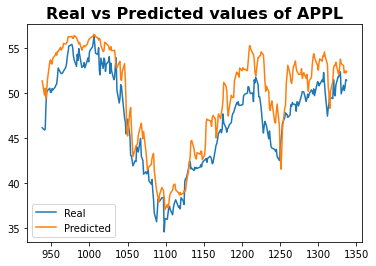

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.plot(stocks['Real'], label="Real")
plt.plot(stocks['Predicted'], label="Predicted")

# Add legend
plt.legend(loc='lower left')
# Add title and x, y labels
plt.title("Real vs Predicted values of APPL", fontsize=16, fontweight='bold')
plt.figure(figsize=(10, 10))
plt.show()